In [1]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from configNA import consumer_key, consumer_secret, access_token, access_token_secret
from pprint import pprint
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from pprint import pprint

In [2]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# Read in merged dataset 
file = "datasets/merged_lists_032118.csv"

df = pd.read_csv(file)

df.head()

,normal_users,fitness_users
0,sbwTweet,relentless084
1,Allisonlmoore,fitplusllc
2,kristib_t,wchazz
3,omoawo_,QRoberts747
4,KelphelpOG,KeynesJohnny


In [4]:
normal_users = df["normal_users"].tolist()
fitness_users = df["fitness_users"].tolist()
# normal_users
# fitness_users

In [5]:
# Set target twitter accounts 
targetnormal_users = normal_users 
targetfitness_users = fitness_users

# Lists to hold user accounts, tweets, dates, & sentiments
user_acct = []
tweet_txt = []
tweet_dt =[]
# Vader lists 
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

In [ ]:
# # Loop through all fitness users 
# for target in targetfitness_users:
    
#     # Loop through once (20 tweets)
#     for x in range(1):
        
#         # Get tweets for one page for each user (20 tweets)
#         public_tweets = api.user_timeline(target, page=x)
        
#         # Loop through all tweets
#         for tweet in public_tweets:
            
#             # Run Vader Analysis on each tweet
#             results = analyzer.polarity_scores(tweet["text"])
#             compound = results["compound"]
#             pos = results["pos"]
#             neu = results["neu"]
#             neg = results["neg"]
            
#             # Add each value to the appropriate list 
#             user_acct.append(target)
#             tweet_txt.append(tweet["text"])
#             tweet_dt.append(tweet["created_at"])
            
#             compound_list.append(compound)
#             positive_list.append(pos)
#             negative_list.append(neg)
#             neutral_list.append(neu)

### Users possibly changed their username or deleted account since fitness usernames were extracted, see error below
TweepError: [{'code': 34, 'message': 'Sorry, that page does not exist.'}]


In [ ]:
# # Convert tweet timestamps to datetime objects
# converted_timestamps = []
# for dt in tweet_dt:
#     converted_time = datetime.strptime(dt, "%a %b %d %H:%M:%S %z %Y")
#     converted_timestamps.append(converted_time)
    
# # Confirm length of list 
# print(len(converted_timestamps))

### Tweet count: 7465
### Tweet count should have been 10,000 (500 users * 20 tweets); likely changed handle or deleted account.

In [ ]:
# # Create dataframe for all accounts and tweets
# df_fit = pd.DataFrame({"Account":user_acct,
#                    "Tweet Text":tweet_txt,
#                    "Date":converted_timestamps,
#                    "Compound":compound_list,
#                    "Positive":positive_list,
#                    "Negative":negative_list,
#                    "Neutral":neutral_list
#                   })
# df_fit.head()
# # Reorder columns 
# df_fit2 = df_fit[['Account', 'Date', 'Tweet Text', 'Compound', 'Positive', 'Neutral', 'Negative']]
# df_fit2.head()

In [ ]:
# #Save df to csv
# df_fit2.to_csv("datasets/fit_tweets.csv",index=False)

In [ ]:
# from matplotlib import style
# style.use('ggplot')

# plt.scatter(range(len(df_fit2["Date"].values)), df_fit2["Compound"], edgecolor="black", color='green', marker="o",
#             alpha=0.65, label="fitness users")

# # Set title and axis labels
# plt.title("Sentiment Analysis of Fitness Tweets")
# plt.ylabel("Tweet Polarity (Compound Score)")
# plt.xlabel("Tweets Ago")
# # plt.legend(bbox_to_anchor=(1, 1),title="Media Sources")
# plt.xticks(rotation="vertical")
# # plt.xlim(-2,102)
# # plt.ylim([-1.05, 1.05])

# # Save and show the figure
# plt.savefig("SentimentAnalysisScatterplot.png")
# plt.show()

In [6]:
# Loop through all normal users 
for target in targetnormal_users:
    
    # Loop through once (20 tweets)
    for x in range(1):
        
        # Get tweets for one page for each user (20 tweets)
        public_tweets = api.user_timeline(target, page=x)
        
        # Loop through all tweets
        for tweet in public_tweets:
            
            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            
            # Add each value to the appropriate list 
            user_acct.append(target)
            tweet_txt.append(tweet["text"])
            tweet_dt.append(tweet["created_at"])
            
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)

TweepError: [{'code': 34, 'message': 'Sorry, that page does not exist.'}]

### Users possibly changed their username or deleted account since fitness usernames were extracted, see error below
TweepError: [{'code': 34, 'message': 'Sorry, that page does not exist.'}]

In [7]:
# Convert tweet timestamps to datetime objects
converted_timestamps = []
for dt in tweet_dt:
    converted_time = datetime.strptime(dt, "%a %b %d %H:%M:%S %z %Y")
    converted_timestamps.append(converted_time)
    
# Confirm length of list 
print(len(converted_timestamps))

200


### Tweet count: 200
### why?

In [8]:
# Create dataframe for all accounts and tweets
df_norm = pd.DataFrame({"Account":user_acct,
                   "Tweet Text":tweet_txt,
                   "Date":converted_timestamps,
                   "Compound":compound_list,
                   "Positive":positive_list,
                   "Negative":negative_list,
                   "Neutral":neutral_list
                  })
df_norm.head()
# Reorder columns 
df_norm2 = df_norm[['Account', 'Date', 'Tweet Text', 'Compound', 'Positive', 'Neutral', 'Negative']]
df_norm2.head()

,Account,Date,Tweet Text,Compound,Positive,Neutral,Negative
0,sbwTweet,2018-03-21 18:46:49+00:00,RT @MikeOutYonder: Trump: I'm not firing Muell...,0.7390,0.299,0.701,0.000
1,sbwTweet,2018-03-21 16:21:42+00:00,"#EpicFail as a snark, @ClaraJeffery, not even ...",0.0000,0.000,1.000,0.000
2,sbwTweet,2018-03-21 16:10:11+00:00,"And if he couldn’t use his fists, Biden has pr...",-0.4588,0.000,0.857,0.143
3,sbwTweet,2018-03-21 16:08:00+00:00,".@TeamCavuto, @Mr.KRudd advises @potus to use ...",-0.6486,0.000,0.739,0.261
4,sbwTweet,2018-03-21 15:52:19+00:00,"Just to help @AP_Politics, you might want to e...",0.8143,0.307,0.693,0.000


In [9]:
#Save df to csv
df_norm2.to_csv("datasets/norm_tweets.csv",index=False)

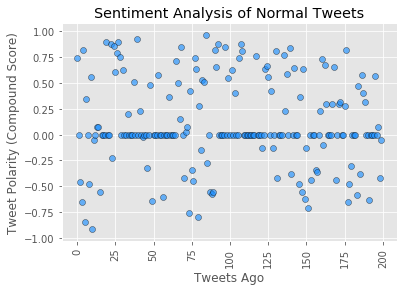

In [11]:
from matplotlib import style
style.use('ggplot')

plt.scatter(range(len(df_norm2["Date"].values)), df_norm2["Compound"], edgecolor="black", color='dodgerblue', marker="o",
            alpha=0.65, label="normal users")

# Set title and axis labels
plt.title("Sentiment Analysis of Normal Tweets")
plt.ylabel("Tweet Polarity (Compound Score)")
plt.xlabel("Tweets Ago")
# plt.legend(bbox_to_anchor=(1, 1),title="Media Sources")
plt.xticks(rotation="vertical")
# plt.xlim(-2,102)
# plt.ylim([-1.05, 1.05])

# Save and show the figure
plt.savefig("SentimentAnalysisScatterplot_norm.png")
plt.show()